In [1]:
%matplotlib inline
'''
%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, 
the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
'''

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import math
import joblib #set of tools to provide lightweight "pipelining" in Python #I used it to save the final model file

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import optuna #For automatic hyperparameter optimization.

xgb.set_config(verbosity=0) #Setting verbosity=0 means silencing frequent logging outputs of xgboost. Increases speed!!!
df = pd.read_csv('C:/Users/Malyaj Mishra/Desktop/DS_IT/Projects/Grofers/My_Modified/Dataset/bank/bank-full.csv',sep=';')

C:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#observing some samples
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#observing datatypes for each column & null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
'''
OBSERVATIONS:
-No Null values
-Some of the datatypes needs to be fixed, like loan default, housing loan etc. can be converted to Boolean/categorical.
'''

'\nOBSERVATIONS:\n-No Null values\n-Some of the datatypes needs to be fixed, like loan default, housing loan etc. can be converted to Boolean/categorical.\n'

In [5]:
#observing some columns more deeply.
df.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [6]:
df.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [7]:
p=df.poutcome.value_counts()
print(p)
print(p.index)

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
Index(['unknown', 'failure', 'other', 'success'], dtype='object')


In [8]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [9]:
#summarized version of numeric columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
'''
OBSERVATIONS:
-It appears that balance & pdays have -ve values as well. Though, balance maybe -ve, pdays as -ve is strange.
-But as -1 constitute 75% of the values, we will keep these values as of now.
-Also Balance has very high magnitude when compared to others. So rescaling of features is needed.
'''

'\nOBSERVATIONS:\n-It appears that balance & pdays have -ve values as well. Though, balance maybe -ve, pdays as -ve is strange.\n-But as -1 constitute 75% of the values, we will keep these values as of now.\n-Also Balance has very high magnitude when compared to others. So rescaling of features is needed.\n'

In [11]:
#Feature Engineering
df['total_calls_ever'] = df['campaign'] + df['previous']
df['y'] = df['y'].replace({'yes':1,'no':0})

In [12]:
df.y.unique() #testing--> just for self-testing/understanding purpose

array([0, 1], dtype=int64)

In [16]:
len(df.columns) #testing


18

In [17]:
print(len([x for x in df.columns])) #testing

18


In [18]:
for index,column in enumerate(df.columns): #testing
    print(index,column)

0 age
1 job
2 marital
3 education
4 default
5 balance
6 housing
7 loan
8 contact
9 day
10 month
11 duration
12 campaign
13 pdays
14 previous
15 poutcome
16 y
17 total_calls_ever


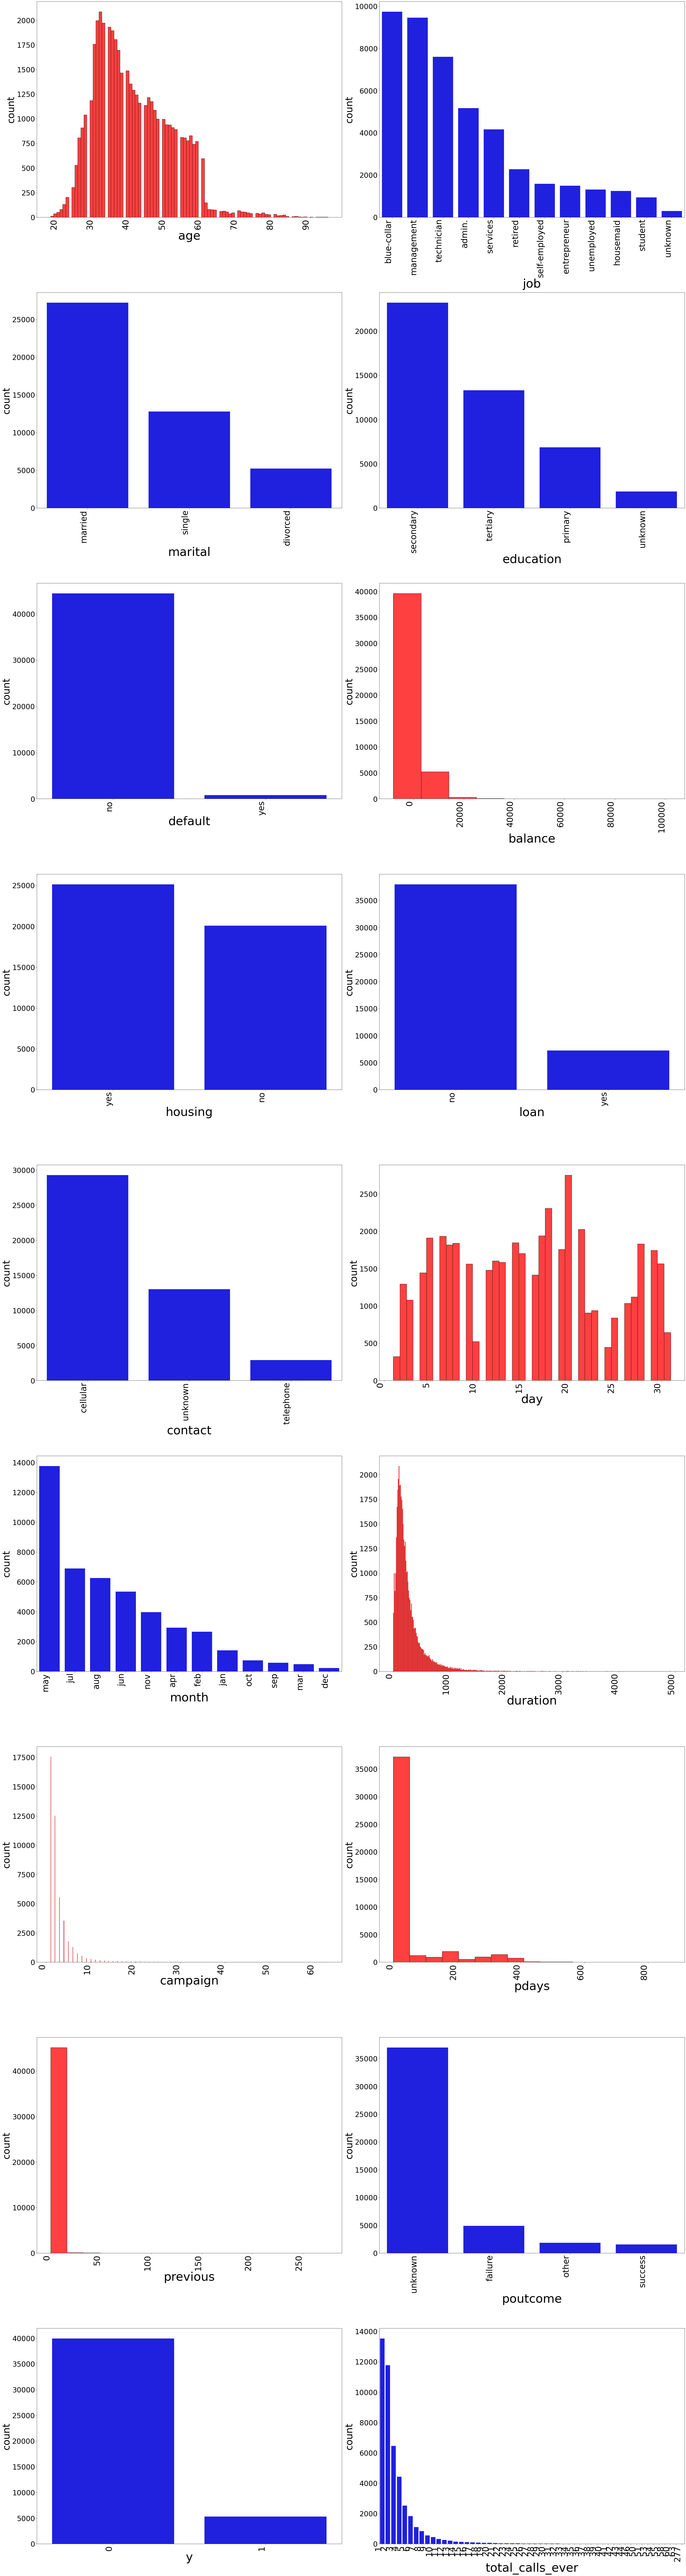

In [19]:
#visualizing distribution of each column

#Using bar plots for categorical/discrete features & histogram for continuous featuers!!!

numeric_columns = ['age','balance','day','duration','campaign','pdays','previous']
total_columns = len(df.columns)
fig,axes = plt.subplots(math.ceil(total_columns/2),2,figsize=(40,150)) 
row = 0
for index,column in enumerate(df.columns):
    if index%2==0 and index!=0:        #for changing rows of subplots figure
        row+=1
    if column not in numeric_columns:   #bar plot for non-numeric columns
        total= df[column].value_counts()
        sns.barplot(x=total.index,y=total,ax=axes[row,index%2],color='blue') 
    elif column=="balance":
        sns.histplot(df[column],bins=10,ax=axes[row,index%2],color='Red') #making separating for 'balance' column for better divison of bins.
        
    else:                               #histogram for numeric columns
        sns.histplot(df[column],ax=axes[row,index%2],color='Red')
    axes[row,index%2].set_xlabel(column, fontsize=50)
    axes[row,index%2].set_ylabel("count", fontsize=40)
    plt.setp(axes[row,index%2].get_xticklabels(), rotation=90, horizontalalignment='right',fontsize=35)
    plt.setp(axes[row,index%2].get_yticklabels(), fontsize=30)
    
fig.tight_layout()
plt.show()

In [20]:
#Observations

'''
1. Clients are usually middle aged --> (25-50 years has highest frequency).
2. Mostly in blue-collar jobs, in management or technician.
3. Clients are usually married.
4. Usually completed secondary education at least.
5. Loan default for clients is usually No.
6. Balance is usually around a few hundreds to 1k-1.5k. Almost negligible number of clients have >15k balance.
7. Most of them don't have personal loans
8. Contacted through cellular phones mostly
9. Mostly contacted around & within 2nd and 3rd quarter of the year.(May,June,July,Aug)
10. Calls are mostly 2-5 minutes long
11. Usually a client is contacted 1-2 times during the current campaign
16. Previous campaign outcome is mostly unknown, then comes the number of "failures"=> very less previous "success".
17. The dataset looks imbalanced. Mostly people don't subscribe to term deposit.(YES:NO=40k:5k) ==> implies we migh want to perform downsampling/upsampling later on!!!
18. Total calls received ever to a customer is usually 1-2.
19. pdays is largely -1, which is a strange value for pdays=no. of days passed by after the client was last contacted
'''


'\n1. Clients are usually middle aged --> (25-50 years has highest frequency).\n2. Mostly in blue-collar jobs, in management or technician.\n3. Clients are usually married.\n4. Usually completed secondary education at least.\n5. Loan default for clients is usually No.\n6. Balance is usually around a few hundreds to 1k-1.5k. Almost negligible number of clients have >15k balance.\n7. Most of them don\'t have personal loans\n8. Contacted through cellular phones mostly\n9. Mostly contacted around & within 2nd and 3rd quarter of the year.(May,June,July,Aug)\n10. Calls are mostly 2-5 minutes long\n11. Usually a client is contacted 1-2 times during the current campaign\n16. Previous campaign outcome is mostly unknown, then comes the number of "failures"=> very less previous "success".\n17. The dataset looks imbalanced. Mostly people don\'t subscribe to term deposit.(YES:NO=40k:5k) ==> implies we migh want to perform downsampling/upsampling later on!!!\n18. Total calls received ever to a custo

agebin
17-26    23.952096
26-33    12.445731
33-41    10.019342
41-49     9.058016
49-56     9.170676
56-64    15.006039
64-72    39.257294
72-80    45.544554
80-87    41.379310
87-95    50.000000
Name: percentage_yes, dtype: float64
job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: percentage_yes, dtype: float64
marital
divorced    11.945458
married     10.123466
single      14.949179
Name: percentage_yes, dtype: float64
education
primary       8.626478
secondary    10.559435
tertiary     15.006390
unknown      13.570275
Name: percentage_yes, dtype: float64
default
no     11.796108
yes     6.380368
Name: percentage_yes, dtype: float64
balancebin
0-2996           11.036451
2996-14010       16.606153
14010-2

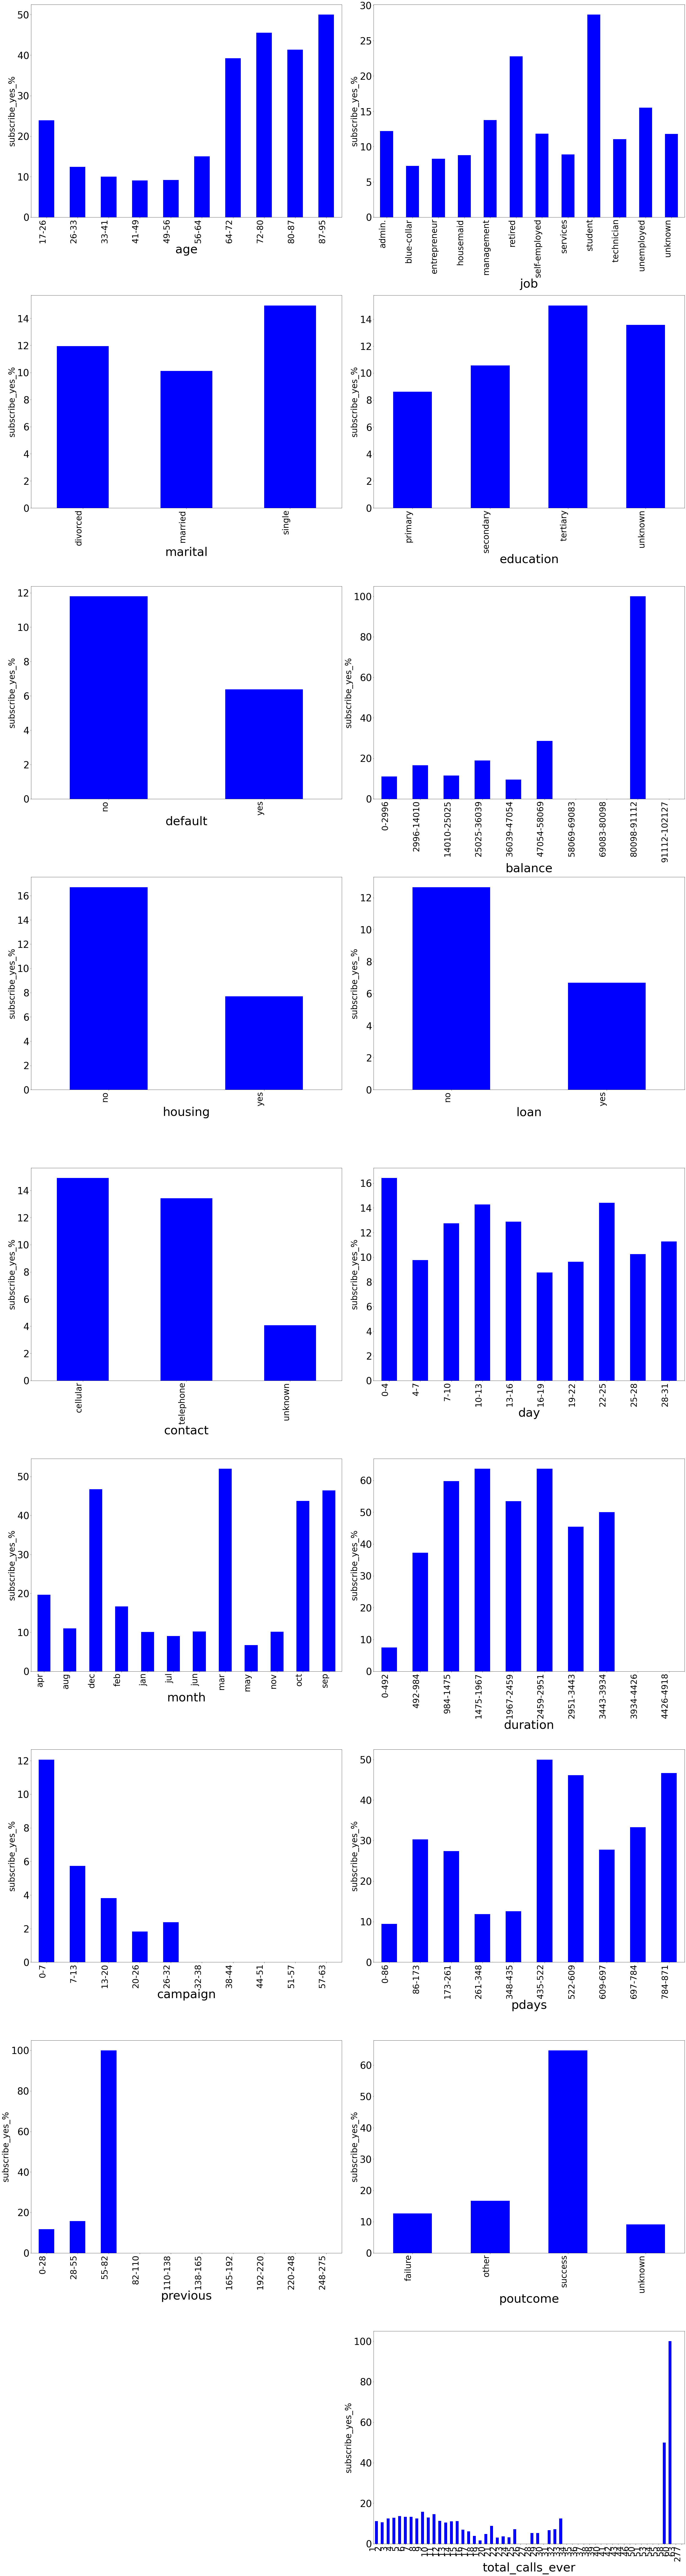

In [21]:
# relationship of all features with with target variable

def binning_func(df,column,drop_columns,is_numeric=False):
    if is_numeric:     #for numeric columns
        bin_column_name = column+'bin'
        df[bin_column_name] = pd.cut(df[column],bins=10,precision=0,include_lowest=True).map(lambda x: '{}-{}'.format(int(0 if x.left<0 else x.left),int(x.right)))
        temp = df.groupby(bin_column_name)[['y']].agg(['count','sum'])
        drop_columns.append(bin_column_name)
   
    else:             #for non-numeric columns
        temp = df.groupby(column)[['y']].agg(['count','sum'])
    temp.columns = ['total','yes']
    temp['percentage_yes'] = 100*temp['yes']/temp['total']
    return temp,drop_columns

columns_to_drop = []
fig,axes = plt.subplots(math.ceil((total_columns)/2),2,figsize=(40,150))
row = 0
for index,column in enumerate(df.columns):
    if index%2==0 and index!=0:
        row+=1
    if column=='y':
        axes[row,index%2].set_visible(False)
        continue
    if column not in numeric_columns:     #for non-numeric columns
        temp,_ = binning_func(df,column,columns_to_drop)  # '_'(underscore) is valid name in python
        
    else:                                 #for numeric columns
        temp,columns_to_drop = binning_func(df,column,columns_to_drop,True)
    
    print(temp["percentage_yes"])
    temp.percentage_yes.plot(kind='bar',color='blue',ax=axes[row,index%2])    
    axes[row,index%2].set_xlabel(column, fontsize=50)
    axes[row,index%2].set_ylabel('subscribe_yes_%', fontsize=35)
    plt.setp(axes[row,index%2].get_xticklabels(), rotation=90, horizontalalignment='right',fontsize=35)
    plt.setp(axes[row,index%2].get_yticklabels(), fontsize=40)
    
fig.tight_layout()
plt.show()

In [22]:
# Observations
'''
1. Elderly customers have high rates of taking subscription for term deposit (64+ years of age)--> 40%+ chances.
2. Student & retired people have highest rates of taking subscription. 
3. Interestingly, blue-collared people have the lowest subscription rates but receive a major chunk of calls.
-- Not much effect of marital status on subscription rate.
4. Higher the education, better the subscription rate.
5. As balance increases, clients tend to subscribe more.
-- Clients having no loan default, no home loan or no personal loan are almost twice as likely to subscribe as compared to ones who have them. 
6. Clients for which last campaign was success tends taking up term deposit subscription more.
7. Clients who received excessive calls (80+) refrain from subscribing (high previous, no subscription), though clients with 55-82 previous calls have ~100% conversion
8. As more days pass of contacting the client by previous campaign, they tend to buy subscription (higher pdays, more subscription)
9  Lower campaign calls, better conversion. 
10. Higher call duration leads to conversion rates as high as 60%. Very low call duration(<492 sec) means NO SUBSCRIPTION in general.
11. Subscription rates are highest around & in the 4th quarter of the year & in March month.
12. Previous campaign calls looks directly proportional to subscription rate.
'''

'\n1. Elderly customers have high rates of taking subscription for term deposit (64+ years of age)--> 40%+ chances.\n2. Student & retired people have highest rates of taking subscription. \n3. Interestingly, blue-collared people have the lowest subscription rates but receive a major chunk of calls.\n-- Not much effect of marital status on subscription rate.\n4. Higher the education, better the subscription rate.\n5. As balance increases, clients tend to subscribe more.\n-- Clients having no loan default, no home loan or no personal loan are almost twice as likely to subscribe as compared to ones who have them. \n6. Clients for which last campaign was success tends taking up term deposit subscription more.\n7. Clients who received excessive calls (80+) refrain from subscribing (high previous, no subscription), though clients with 55-82 previous calls have ~100% conversion\n8. As more days pass of contacting the client by previous campaign, they tend to buy subscription (higher pdays, mo

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


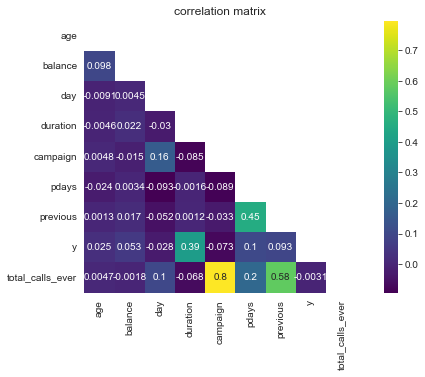

In [23]:
#observing correlation between numerical variables (NOTE that using coorelation we can only gauge relationship 
#b/w numeric variables and not categorical variables, so we can use above type of visualisations for it.)
#pdays & previous looks correlated alongside target & call_duration
corr = df.corr() 
'''
dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.
Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.
'''

mask = np.zeros_like(corr) #producing array having 'corr' shape & type && value of all elements=0.
print(mask)
mask[np.triu_indices_from(mask)] = 1     #triu_indices_from==>Return the indices for the upper-triangle of arr.
print(mask)
with sns.axes_style("white"):
    plt.figure(figsize=(10,5))
    plt.title('correlation matrix')
    ax = sns.heatmap(corr, annot=True, mask=mask, square=True,cmap='viridis')
    plt.show()

In [24]:
#Converting categorical/string columns to numerical data. This step can be skipped for CatBoost which can intake categorical data
#One Hot Encoding(OHE) can also be used. I used Label Encoding.
#Both OHE and LE have +ves and -ves.
#OHE can also be used but it has a drawback that it'll increase the features/columns by manyfolds, making further modelling complex.
#LE has a drawback that sometimes it gives a wrong picture of closeness of two values of a features. 
#Eg: Using LE in "marital"--> Single=0, married=1, divorced=2. ==> This tells that Single(0) and divorced(2) have more difference,
#which is not actually true. All three values of 'marital' feature are equally distant/related.


def text_to_float(column):
    if column.dtype==np.object:
        label_encoder = preprocessing.LabelEncoder()
        column = label_encoder.fit_transform(column.astype(str))    #Fit label encoder and return encoded labels.
        return column
    return column

df = df.apply(text_to_float)
df.head()

C:\Users\Malyaj Mishra\AppData\Local\Temp\ipykernel_10400\3754918537.py:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if column.dtype==np.object:


,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,total_calls_ever,agebin,balancebin,daybin,durationbin,campaignbin,pdaysbin,previousbin
0,58,4,1,2,0,2143,1,0,2,5,...,3,0,1,56-64,0-2996,4-7,0-492,0-7,0-86,0-28
1,44,9,2,1,0,29,1,0,2,5,...,3,0,1,41-49,0-2996,4-7,0-492,0-7,0-86,0-28
2,33,2,1,1,0,2,1,1,2,5,...,3,0,1,26-33,0-2996,4-7,0-492,0-7,0-86,0-28
3,47,1,1,3,0,1506,1,0,2,5,...,3,0,1,41-49,0-2996,4-7,0-492,0-7,0-86,0-28
4,33,11,2,3,0,1,0,0,2,5,...,3,0,1,26-33,0-2996,4-7,0-492,0-7,0-86,0-28


In [25]:
#dropping binned columns prepared for eda & duration column as mentioned in metadata on website; 
#Reason to drop 'call duration'-->because call duration is only known once the call is over and by that time you know the value of target variable 'y'(subscribed or not)!!!
drop_columns = [x for x in df.columns if 'bin' in x]+['duration']
df = df.drop(drop_columns,axis=1)

In [26]:
# Scaling data so as to suppress dominant magnitudes
#Using standardscaler, minmax scaler or robust scaler(Robust scaler is robust against outliers.)
for column in df.columns:
    df[column] = preprocessing.MinMaxScaler().fit_transform(df[column].values.reshape(-1,1))

In [27]:
#Downsampling & upsampling simultaneously to counter imbalance in dataset.
temp_n = df[df['y']==0].sample(n=10000) #Downsampling 'No subscription' cases.
temp_y = pd.concat([df[df['y']==1],df[df['y']==1]]) #Upsampling 'Yes subscription' cases.
df = temp_y.append(temp_n) #combining both downsampled and upsampled datasets.
df = df.sample(frac=1) #Shuffling the final combined dataset.

C:\Users\Malyaj Mishra\AppData\Local\Temp\ipykernel_10400\2580631794.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = temp_y.append(temp_n)


In [28]:
# train test splitting in 80:20 ratio
labels = df.pop('y')   #pop() removes the 'y' column from df and returns it to labels
df = df.applymap(lambda x: round(x,3))
train_x, test_x, train_y, test_y = model_selection.train_test_split(df,labels,train_size=0.8)

In [29]:
#comparing different models using F1 score as metric

models,results,names = [],[],[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('NB', GaussianNB()))



scoring = 'f1'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, train_x, train_y, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.683500 (0.008455)
KNN: 0.691399 (0.010397)


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; a

XGB: 0.758171 (0.007669)
NB: 0.690171 (0.011203)


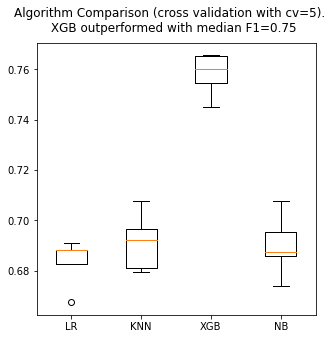

In [30]:
#comparing different models 

fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison (cross validation with cv=5). \n XGB outperformed with median F1=0.75')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [31]:
#Tuning some hyperparameters for XGBoost, the best performing model from above analysis. Tuning on some parameters for demonstartion else would have taken time to train
import optuna
def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 20, 100)
        max_depth = int(trial.suggest_loguniform('max_depth', 3, 10))
        clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
        return model_selection.cross_val_score(clf, train_x, train_y  ,cv=3, scoring='f1').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2022-10-30 14:16:17,569] A new study created in memory with name: no-name-d01c7529-19b5-4ee9-a384-36fd80f2121f
C:\Users\Malyaj Mishra\AppData\Local\Temp\ipykernel_10400\4117576033.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  max_depth = int(trial.suggest_loguniform('max_depth', 3, 10))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is

C:\Users\Malyaj Mishra\AppData\Local\Temp\ipykernel_10400\4117576033.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  max_depth = int(trial.suggest_loguniform('max_depth', 3, 10))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; a

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-10-30 14:16:31,455] Trial 9 finished with value: 0.741168270731821 and parameters: {'n_estimators': 51, 'max_depth': 6.353290313187398}. Best is trial 6 with value: 0.7856896934443158.


In [32]:
print('best_parameter_set',study.best_params)
print('best f1 score',study.best_value)

best_parameter_set {'n_estimators': 69, 'max_depth': 9.706268760589602}
best f1 score 0.7856896934443158


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


f1_score on test data 0.8324449594438007
accuracy on test data 0.8243440233236151


<AxesSubplot:xlabel='importance'>

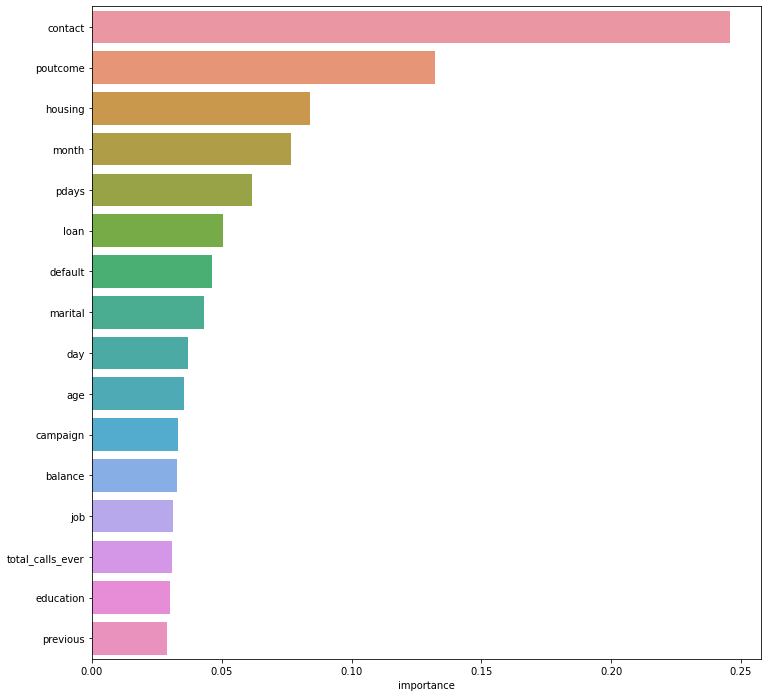

In [33]:
import xgboost as xgb
xgb.set_config(verbosity=0)

model = xgb.XGBClassifier(n_estimators=study.best_params['n_estimators'],max_depth=int(round(study.best_params['max_depth'],0)),silent=True)
model.fit(train_x,train_y)
predictions = model.predict(test_x)
print('f1_score on test data',metrics.f1_score(test_y,predictions))
print('accuracy on test data', metrics.accuracy_score(test_y,predictions))

#figuring feature importance
plt.figure(figsize=(12,12))
feature_imp_map = {x:y for x,y in zip(df.columns,model.feature_importances_)}
feature_imp_map = dict(sorted(feature_imp_map.items(), key=lambda item: item[1],reverse=True))
plt.xlabel('importance')
sns.barplot(y=[x for x in feature_imp_map.keys()],x=[x for x in feature_imp_map.values()],orient='h')

In [34]:
#saving model
filename = 'term_deposit_sub.model'
joblib.dump(model, open(filename, 'wb'))